<a href="https://colab.research.google.com/github/bruno-sl15/-QuarentenaDados-Alura/blob/master/QuarentenaDados_Aula04_desafios_resolvidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução


Olá, seja bem-vinda e bem-vindo ao notebook da **aula 04!** A partir desta aula iremos analisar e discutir um *sample* da base de dados do **ENEM 2018**. Nessa aula vamos falar sobre diversos temas importantes na área de IA, então **acompanhar esses explicações pela videoaula será importante para o seu desenvolvimento**.

#Aula 4

Aqui iremos explorar e conhecer uma pequena amostra da base de dados do **ENEM 2018**. Esse será o primeiro passo para construir os **modelos de machine learning da aula 05**. Se você quiser estudar o código utilizado para criar o dataset desta aula, pode acessar este [**link aqui**](https://github.com/guilhermesilveira/enem-2018).

Vamos iniciar setando a precisão de casas decimais que o pandas irá exibir os dados (`pd.options.display.float_format`), depois lendo e conhecendo as informações contidas na base de dados.



In [0]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()

# Dicionário -> https://docs.google.com/spreadsheets/d/12KI_L1WPRMKCedflSYENw6Me8L86dv-Yyf9OPVR2CEE/edit#gid=651943210

# Como foi extraido o sample:
#%precision %.2f
#pd.options.display.float_format = '{:,.2f}'.format

#ano = "2018"
#fonte = f"MICRODADOS_ENEM_{ano}.csv"

#dados = pd.read_csv(fonte, encoding="ISO-8859-1", delimiter=";")
#dados.shape

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


Conheça todas as colunas do nosso dataframe:

In [0]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

Na videoaula tivemos uma discussão muito bacana sobre uma visão geral dos dados e sua organização, e sobre ética na IA. Se você não assistiu eu recomendo que veja, não cabe aqui no notebook reproduzir a conversa, então vamos seguir com o  desenvolvimento.


Conhecidas as informações, vamos chamar o **describe()** para analisá-las. Se atente ao detalhe que o **describe** só gera informação de dados numéricos!

In [0]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

A saída do `describe` traz várias estatísticas, de forma que algumas não fazem sentido ou não nos interessam neste momento.  Entretanto, se você analisou as últimas colunas, viu que lá temos alguns dados relevantes: notas das provas e redação. 

Desafio você a entrar nos detalhes das análises de notas e diversos outros campos! Como nosso tempo aqui é restrito, vamos analisar apenas as notas entre si, mas reflita: Será que existe uma correlação entre as notas? Quem tira notas maiores em redação também vai bem em linguagens?

Vamos analisar!

In [0]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [0]:
len(dados_notas)

97270

Como queremos analisar as notas detalhadamente, no código acima separamos apenas os dados de interesse. Também removemos todos os valores vazios com o `.dropna()` e trocamos os nomes das colunas para ficar mais legível. 

Por fim, agora nosso DF tem 97270 linhas e 5 colunas.

Agora sim, vamos calcular a correlação usando o `.corr()`:

In [0]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Temos vários resultados interessantes por aqui: o primeiro é uma correlação considerável entre **linguagem_codigo e ciencias_humanas**, o que parece fazer sentido. Uma correlação que surpreende é entre **linguagem_codigo e redacao**. Embora haja uma correlação maior em relação às outras matérias e redação, eu esperava um valor ainda maior do que o existente. 

**Mais alguma correlação te chama a atenção? **

Eu tenho mais uma análise das correlações em geral! Repare que as correlações com linguagem_codigos sempre são as maiores e isso me faz pensar em várias hipóteses!

Será que se eu estudar mais português vou ter um desempenho melhor nas outras matérias? (lembre-se que o ENEM é uma prova que demanda interpretação de texto, então essa prerrogativa pode fazer sentido).
Será que se eu considerar provas de anos anteriores e comparar as correlações com linguagem_códigos elas serão maiores?

A verdade é que uma simples análise de correlação nos gera diversas hipóteses. **Se tiver curiosidade e quiser fazer essas análises fica como um desafio extra!**

Na videoaula você viu que tentamos plotar diversos gráficos para visualizar a correlação de uma melhor forma. Abaixo seguem os códigos usados:

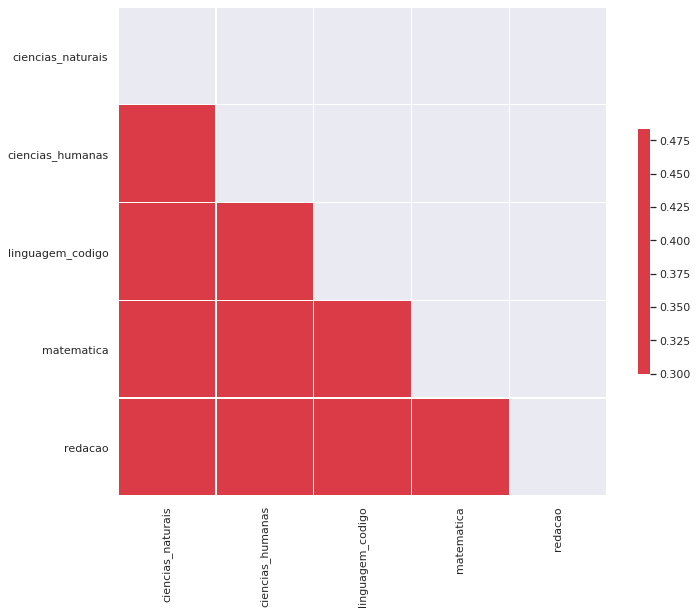

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

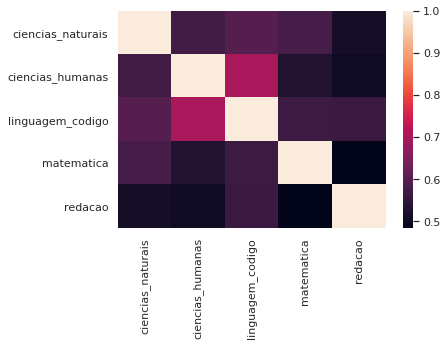

In [0]:
sns.heatmap(corr)

Depois de apanhar tentando criar boas imagens, resolvemos deixar esse desafio para você kkkkk... Resolva e dê aquela cornetada em nosso time uahuahha...

Ok, nós analisamos e conhecemos a base de dados, mas no final o que vou querer é construir um modelo de ML para fazer as predições de algumas notas. Para criar esse modelo de machine learning devemos analisar a distribuição dos nossos dados e verificar se existe alguma tendência entre eles, facilitando o processo preditivo. 

Então, vamos ao **pairplot**:

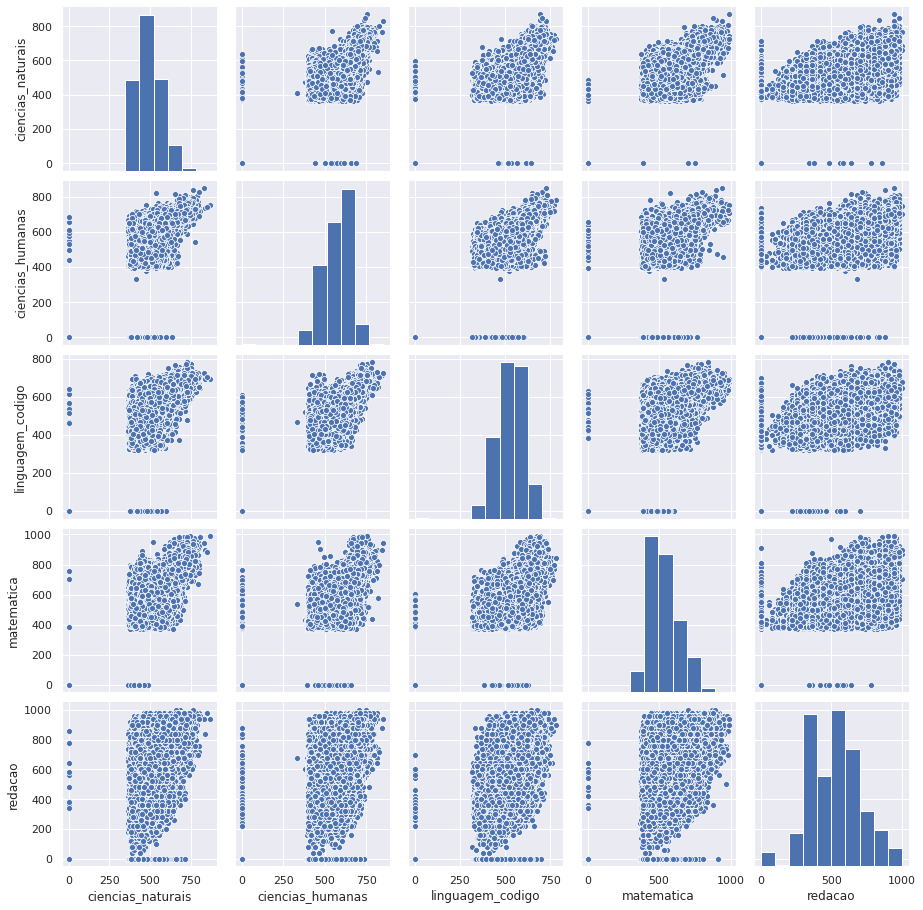

In [0]:
sns.pairplot(dados_notas)

Embora existam alguns dados com maior dispersão, outros parecem obedecer uma certa tendência. Dessa forma, desenvolver um modelo de ML com resultados razoáveis será complexo, porém possível (para detalhes das análises, acompanhe a discussão na videoaula).

Com isso chegamos ao final de mais uma aula da #quarentenadados. E aí, o que está achando?

Agora iremos entrar em uma área totalmente nova: o desenvolvimento de modelos de machine learning! Espero que você esteja empolgado(a) para conhecer um pouquinho mais sobre esse assunto!

Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para você.

Até a próxima aula!


P.S: A partir de agora você irá colocar a mão na massa, nossos desafios serão mais analítcos. Queremos que você vivencie o dia-a-dia de um ciêntista de dados, discutindo suas conclusões no Slack e estudando as análises de outros colegas, por isso não haverá gabarito.

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [0]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas2 = dados[colunas_de_notas].fillna(0)
dados_notas2.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0.00,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,0.00,0.00,0.00,0.00,0.00


Uma alternativa seria:

```
# Dados do dicionário do ENEM
faltou = 0
presente = 1
eliminado = 2

dados_nota = dados.copy()

dados_nota.loc[dados['TP_PRESENCA_CN'].isin([faltou, eliminado]), 'NU_NOTA_CN'] = 0 # dados[dados['TP_PRESENCA_CN'] == presente]['NU_NOTA_CN'].mean()
dados_nota.loc[dados['TP_PRESENCA_CH'].isin([faltou, eliminado]), 'NU_NOTA_CH'] = 0
dados_nota.loc[dados['TP_PRESENCA_LC'].isin([faltou, eliminado]), 'NU_NOTA_LC'] = 0
dados_nota.loc[dados['TP_PRESENCA_MT'].isin([faltou, eliminado]), 'NU_NOTA_MT'] = 0

dados_nota[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()
```



## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

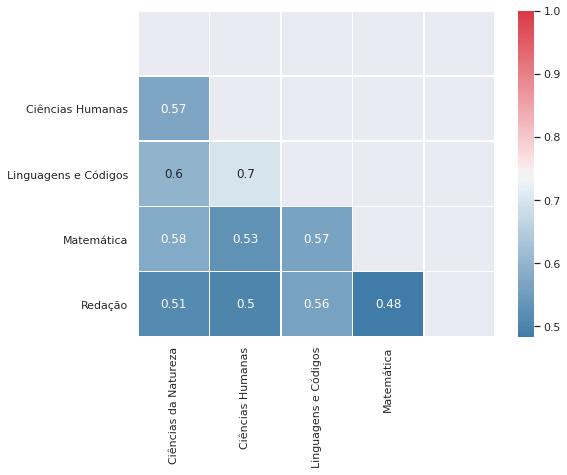

In [0]:
labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

# Reseta as configurações do seaborn para o padrão
sns.set()

# Configura a figura do matplotlib
f, ax = plt.subplots(figsize=(8, 6))

# Configura a paleta de cores
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Cria uma máscara para o triângulo de cima
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr,
            xticklabels = labels[0:4],
            yticklabels = [''] + labels[1:5],
            linewidths = .5,
            mask = mask, 
            cmap = cmap,
            annot = True,)

plt.show()


## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [0]:
def calc_acertos(candidato, prova):
  respostas = candidato.get(f'TX_RESPOSTAS_{prova}')
  gabarito = candidato.get(f'TX_GABARITO_{prova}')
  
  if (type(respostas) != str or type(gabarito) != str):
    return 0
  
  return sum(r==g for r, g in zip(respostas, gabarito))

In [0]:
colunas_respostas_gabarito = ['TX_RESPOSTAS_CN', 'TX_GABARITO_CN', 
                              'TX_RESPOSTAS_CH', 'TX_GABARITO_CH', 
                              'TX_RESPOSTAS_LC', 'TX_GABARITO_LC', 
                              'TX_RESPOSTAS_MT', 'TX_GABARITO_MT',
                              'NU_NOTA_REDACAO']

dados_acertos = dados[colunas_respostas_gabarito].dropna()

dados_acertos['NU_ACERTOS_CN'] = dados_acertos.apply(calc_acertos, prova='CN', axis=1)
dados_acertos['NU_ACERTOS_CH'] = dados_acertos.apply(calc_acertos, prova='CH', axis=1)
dados_acertos['NU_ACERTOS_LC'] = dados_acertos.apply(calc_acertos, prova='LC', axis=1)
dados_acertos['NU_ACERTOS_MT'] = dados_acertos.apply(calc_acertos, prova='MT', axis=1)

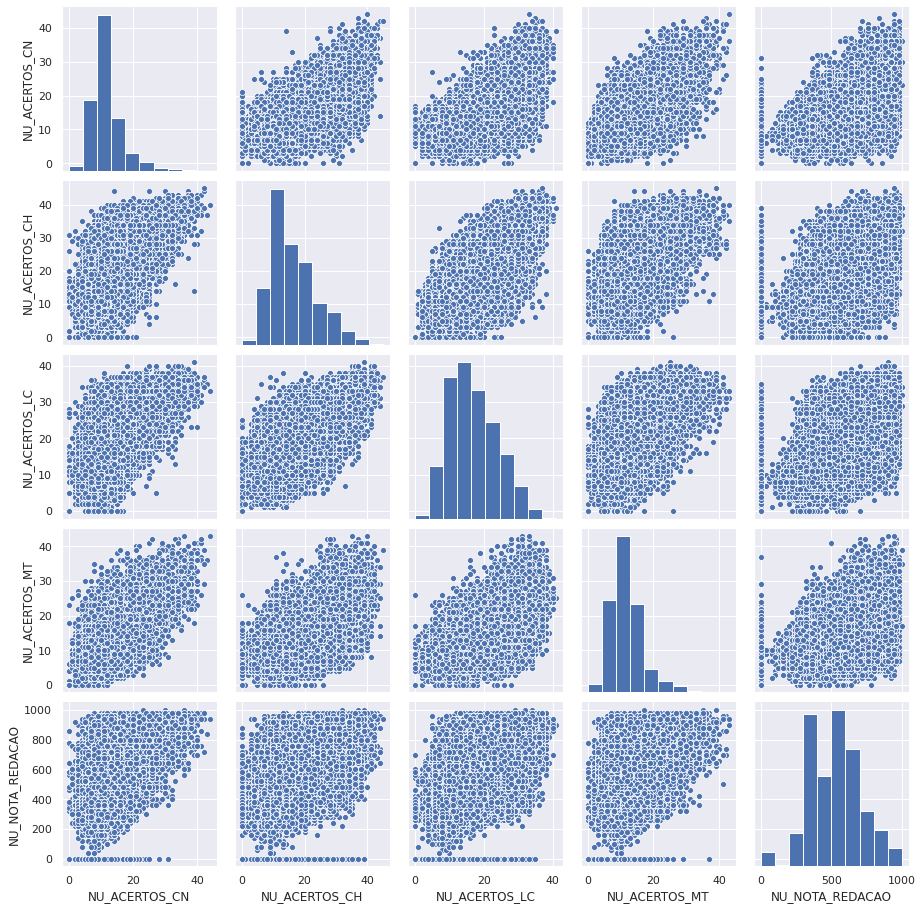

In [0]:
colunas_de_acertos = ['NU_ACERTOS_CN', 'NU_ACERTOS_CH', 'NU_ACERTOS_LC', 'NU_ACERTOS_MT', 'NU_NOTA_REDACAO']
sns.pairplot(dados_acertos[colunas_de_acertos])

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [0]:
dados_notas_sem_0 = dados_notas2.copy()
dados_notas_sem_0['NU_NOTA_CN'] = dados_notas_sem_0['NU_NOTA_CN'].replace(0., np.NaN)
dados_notas_sem_0['NU_NOTA_CH'] = dados_notas_sem_0['NU_NOTA_CH'].replace(0., np.NaN)
dados_notas_sem_0['NU_NOTA_LC'] = dados_notas_sem_0['NU_NOTA_LC'].replace(0., np.NaN)
dados_notas_sem_0['NU_NOTA_MT'] = dados_notas_sem_0['NU_NOTA_MT'].replace(0., np.NaN)
dados_notas_sem_0['NU_NOTA_REDACAO'] = dados_notas_sem_0['NU_NOTA_REDACAO'].replace(0., np.NaN)

dados_notas_sem_0.dropna(subset=colunas_de_notas, inplace=True)

dados_notas_sem_0.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [0]:
def corrige_questoes(candidato, prova):
  respostas = candidato.get(f'TX_RESPOSTAS_{prova}')
  gabarito = candidato.get(f'TX_GABARITO_{prova}')
  
  return pd.Series([int(r==g) for r, g in zip(respostas, gabarito)])

In [0]:
#Analisando a prova azul de matemática
prova_mt_azul = dados.query('CO_PROVA_MT == 459')

matriz_acertos = prova_mt_azul.apply(corrige_questoes, prova='CN', axis=1)
matriz_acertos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
10,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
15,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
137808,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0
137821,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0
137834,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


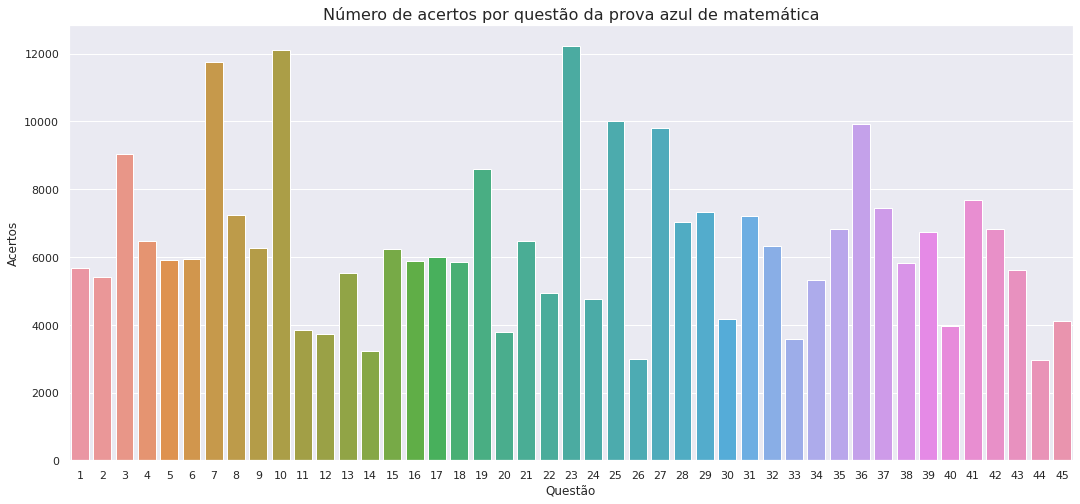

In [0]:
total_acertos_por_questao = pd.DataFrame(matriz_acertos.sum())
total_acertos_por_questao.reset_index(inplace=True)
total_acertos_por_questao.columns = ['Questão', 'Acertos']
total_acertos_por_questao['Questão'] = total_acertos_por_questao['Questão'] + 1
total_acertos_por_questao

plt.figure(figsize=(18,8))

ax = sns.barplot(data=total_acertos_por_questao, x='Questão', y='Acertos')
ax.set_title('Número de acertos por questão da prova azul de matemática', fontsize=16)

plt.show()

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no Twitter, seja LinkedIn. Boa sorte!